In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from toygrad import MLP, Layer, Sigmoid, SoftMax, ReLU, TanH, Linear, SquaredError, BinaryCrossEntropy, CategoricalCrossEntropy, AbsoluteError
from plot import plot_train_test_losses, plot_categorical_decisions, plot_regression_decisions, plot_network

np.random.seed(2137)
plt.rcParams["figure.figsize"] = (15,10)

CLF = "data/classification"
REG = "data/regression"
DATASET_SIZES = [10000]#, 500, 1000, 10_000]

def one_hot(y):
    y = y.astype(int) - 1
    if (y.max() == 1):
        # This means this is a binary class - we can use a single variable
        return np.reshape(y, (-1, 1))
    encoded = np.zeros((y.size, y.max()+1))
    encoded[np.arange(y.size),y] = 1
    return encoded

def read_data(path, categorical=False, normalize_inputs=False):
    def normalize(vector):
        return (vector - vector.min()) / (np.ptp(vector))
    assert not (categorical and normalize_inputs), "Cannot normalize categorical data"
    """Read and shuffle the dataset"""
    data = np.genfromtxt(path, delimiter=',')[1:]
    np.random.shuffle(data)
    X = data[:, :-1]
    Y = one_hot(data[:, -1]) if categorical else data[:, -1].reshape(-1, 1)
    if normalize_inputs:
        X, Y = normalize(X), normalize(Y)    
    return X, Y

# Classification

### Simple dataset

Simple dataset (train/test sample size 1000)
Epoch   10 - train loss 0.684 (std:0.05) - test loss 0.671 (std:0.14)
Epoch   20 - train loss 0.367 (std:0.05) - test loss 0.338 (std:0.21)
Epoch   30 - train loss 0.129 (std:0.05) - test loss 0.126 (std:0.18)
Epoch   40 - train loss 0.083 (std:0.04) - test loss 0.083 (std:0.16)
Epoch   50 - train loss 0.064 (std:0.04) - test loss 0.064 (std:0.14)


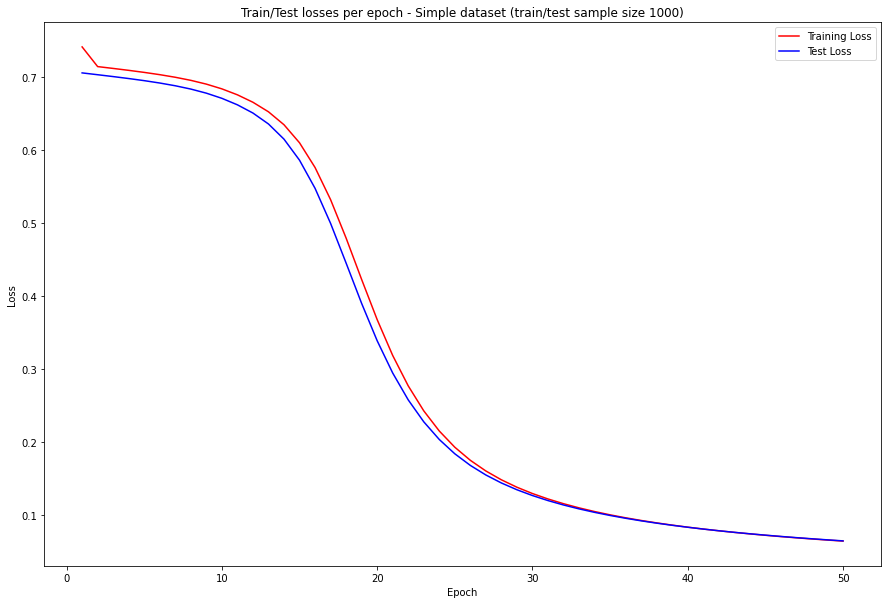

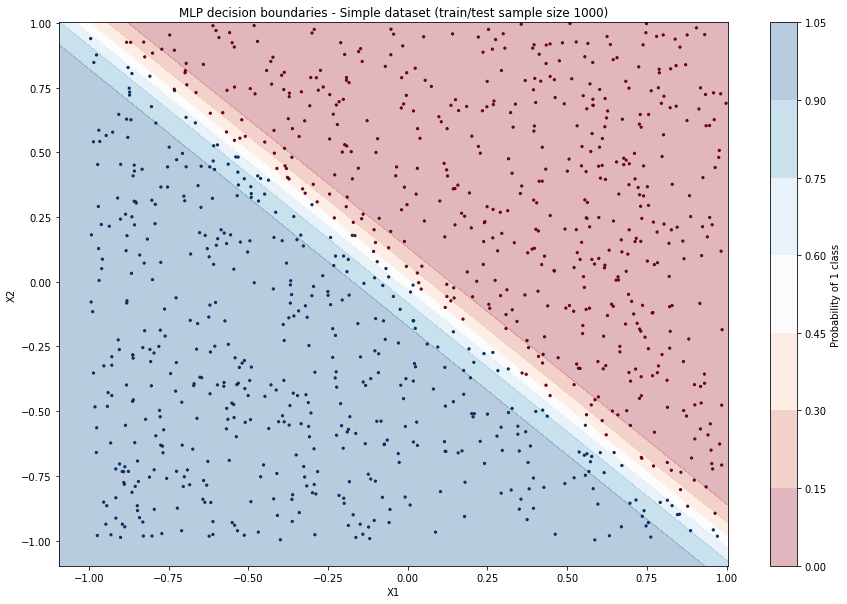

In [2]:
for size in DATASET_SIZES:
    X, Y = read_data(f"{CLF}/data.simple.train.{size}.csv", categorical=True)
    X_test, Y_test = read_data(f"{CLF}/data.simple.test.{size}.csv", categorical=True)
    
    layers = [
        Layer(in_size=2, out_size=5, activ_function=Sigmoid),
        Layer(in_size=5, out_size=5, activ_function=Sigmoid),
        Layer(in_size=5, out_size=1, activ_function=Sigmoid),
    ]
    print("=======================================================================================")
    header = f"Simple dataset (train/test sample size {size})"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=BinaryCrossEntropy,
        bias=True,
        batch_size=16,
        epochs=50,
        momentum=0.001,
        learning_rate=0.5,
    )
    stats = m.train(X,Y, X_test, Y_test)
    plot_train_test_losses(**stats, title=f"Train/Test losses per epoch - {header}")
    plot_categorical_decisions(X_test, Y_test, m, f"MLP decision boundaries - {header}", binary=True)

### Three Gauss dataset

Three Gauss dataset (train/test sample size 1000)
Epoch   10 - train loss 0.365 (std:0.01) - test loss 0.364 (std:0.02)
Epoch   20 - train loss 0.360 (std:0.01) - test loss 0.360 (std:0.03)
Epoch   30 - train loss 0.347 (std:0.01) - test loss 0.345 (std:0.04)
Epoch   40 - train loss 0.286 (std:0.02) - test loss 0.280 (std:0.09)
Epoch   50 - train loss 0.200 (std:0.03) - test loss 0.197 (std:0.11)
Epoch   60 - train loss 0.159 (std:0.03) - test loss 0.157 (std:0.13)
Epoch   70 - train loss 0.136 (std:0.04) - test loss 0.134 (std:0.15)
Epoch   80 - train loss 0.113 (std:0.04) - test loss 0.111 (std:0.15)
Epoch   90 - train loss 0.092 (std:0.04) - test loss 0.091 (std:0.15)
Epoch  100 - train loss 0.080 (std:0.04) - test loss 0.080 (std:0.16)


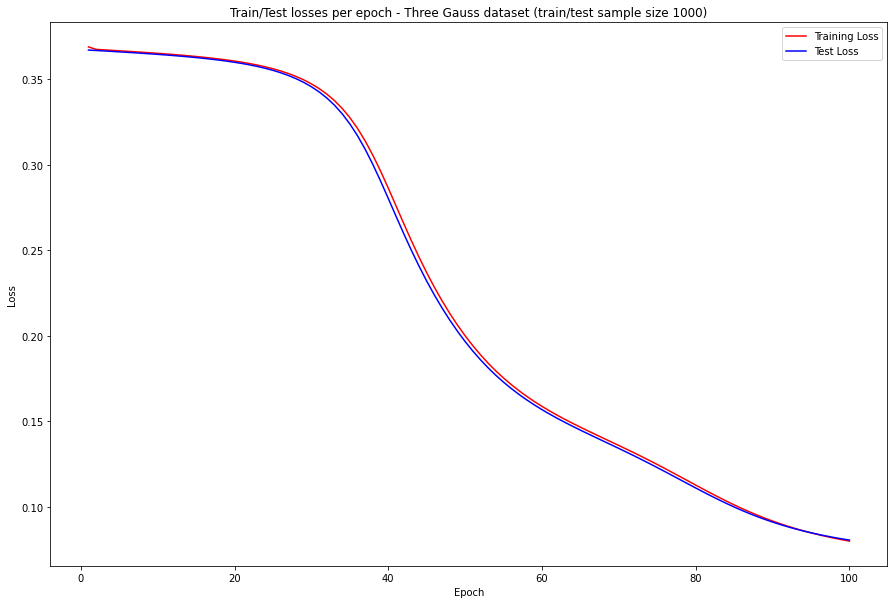

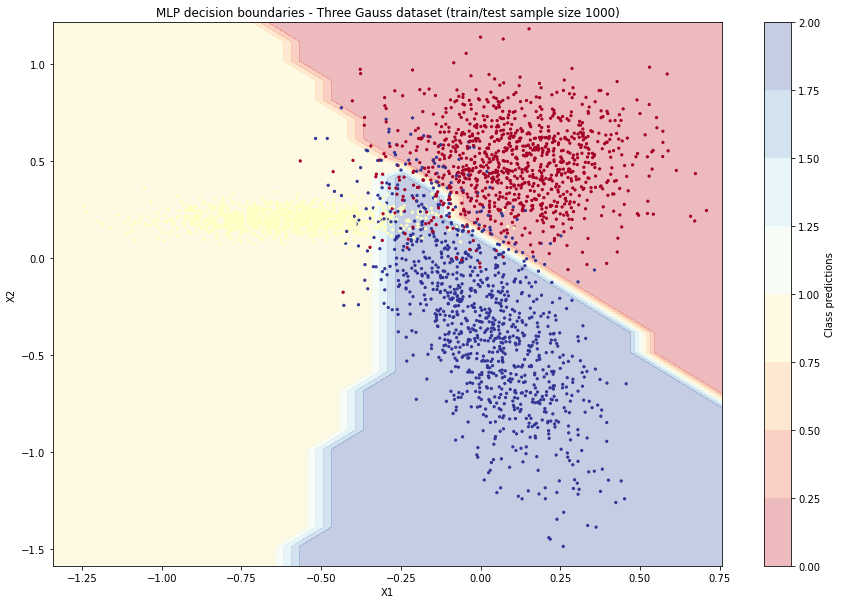

In [3]:
for size in DATASET_SIZES:
    X, Y = read_data(f"{CLF}/data.three_gauss.train.{size}.csv", categorical=True)
    X_test, Y_test = read_data(f"{CLF}/data.three_gauss.test.{size}.csv", categorical=True)
    layers = [
        Layer(in_size=2, out_size=5, activ_function=Sigmoid),
        Layer(in_size=5, out_size=5, activ_function=Sigmoid),
        Layer(in_size=5, out_size=3, activ_function=SoftMax),
    ]
    print("=======================================================================================")
    header = f"Three Gauss dataset (train/test sample size {size})"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=CategoricalCrossEntropy,
        bias=True,
        batch_size=16,
        epochs=100,
        momentum=0.1,
        learning_rate=0.2,
    )
    stats = m.train(X,Y, X_test, Y_test)
    plot_train_test_losses(**stats, title=f"Train/Test losses per epoch - {header}")
    plot_categorical_decisions(X_test, Y_test, m, f"MLP decision boundaries - {header}")

# Regression

### Activation dataset

Activation dataset (train/test sample size 1000)
Epoch   10 - train loss 6.839 (std:1.40) - test loss 14.597 (std:12.91)
Epoch   20 - train loss 2.252 (std:0.47) - test loss 7.133 (std:9.13)
Epoch   30 - train loss 0.562 (std:0.19) - test loss 4.495 (std:7.38)
Epoch   40 - train loss 0.421 (std:0.12) - test loss 3.778 (std:6.39)
Epoch   50 - train loss 0.338 (std:0.10) - test loss 3.386 (std:5.86)
Epoch   60 - train loss 0.278 (std:0.08) - test loss 3.145 (std:5.49)
Epoch   70 - train loss 0.234 (std:0.07) - test loss 2.979 (std:5.21)
Epoch   80 - train loss 0.203 (std:0.06) - test loss 2.856 (std:5.00)
Epoch   90 - train loss 0.181 (std:0.05) - test loss 2.759 (std:4.82)
Epoch  100 - train loss 0.166 (std:0.05) - test loss 2.681 (std:4.68)
Epoch  110 - train loss 0.155 (std:0.04) - test loss 2.615 (std:4.56)
Epoch  120 - train loss 0.147 (std:0.04) - test loss 2.558 (std:4.45)
Epoch  130 - train loss 0.140 (std:0.04) - test loss 2.508 (std:4.36)
Epoch  140 - train loss 0.135 (std:0.04

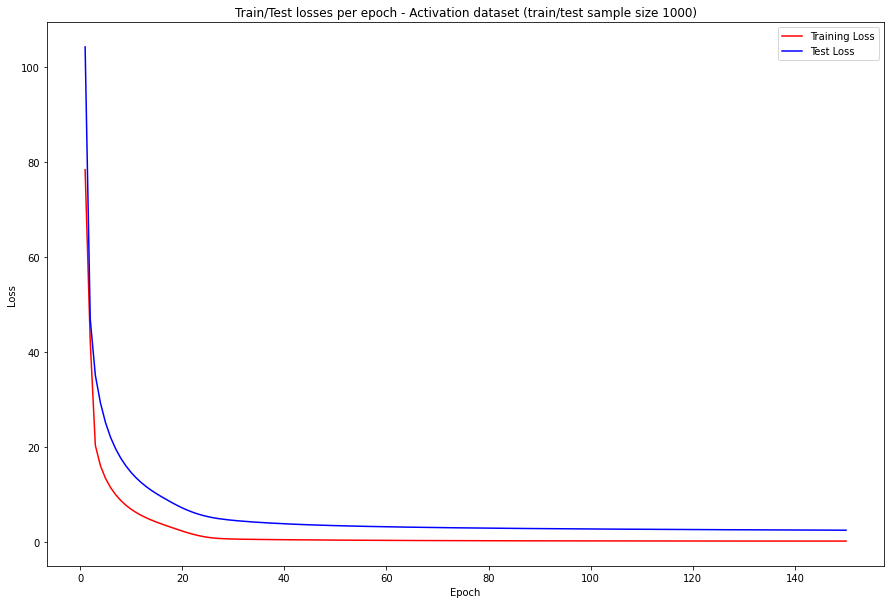

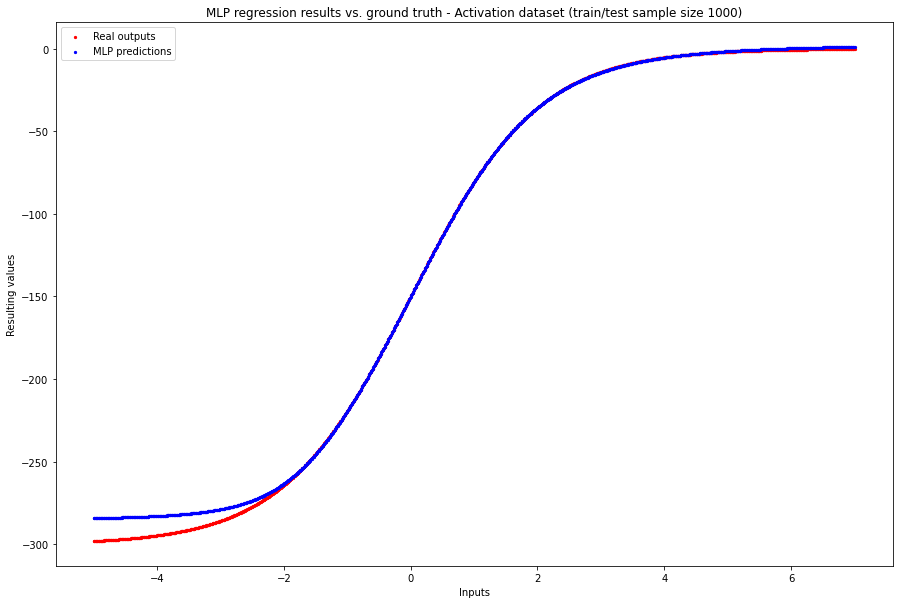

In [4]:
for size in DATASET_SIZES:
    X, Y = read_data(f"{REG}/data.activation.train.{size}.csv")
    X_test, Y_test = read_data(f"{REG}/data.activation.test.{size}.csv")
    layers = [
        Layer(in_size=1, out_size=4, activ_function=Sigmoid),
        Layer(in_size=4, out_size=6, activ_function=Sigmoid),
        Layer(in_size=6, out_size=1, activ_function=Linear),
    ]
    print("=======================================================================================")
    header = f"Activation dataset (train/test sample size {size})"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=AbsoluteError,
        bias=True,
        batch_size=16,
        epochs=150,
        momentum=0.1,
        learning_rate=0.01,
    )
    stats = m.train(X,Y, X_test, Y_test)
    plot_train_test_losses(**stats, title=f"Train/Test losses per epoch - {header}")
    plot_regression_decisions(X_test, Y_test, m, f"MLP regression results vs. ground truth - {header}")

### Cube dataset

Cube dataset (train/test sample size 1000)
Epoch   10 - train loss 35.498 (std:9.18) - test loss 219.730 (std:291.26)
Epoch   20 - train loss 15.868 (std:6.03) - test loss 188.921 (std:276.68)
Epoch   30 - train loss 12.123 (std:4.05) - test loss 175.913 (std:264.95)
Epoch   40 - train loss 11.124 (std:3.47) - test loss 169.930 (std:258.86)
Epoch   50 - train loss 10.759 (std:3.22) - test loss 166.393 (std:255.11)
Epoch   60 - train loss 10.546 (std:3.09) - test loss 164.032 (std:252.61)
Epoch   70 - train loss 10.579 (std:2.99) - test loss 162.773 (std:251.23)
Epoch   80 - train loss 10.571 (std:2.92) - test loss 161.601 (std:250.00)
Epoch   90 - train loss 10.716 (std:2.91) - test loss 160.782 (std:249.46)
Epoch  100 - train loss 10.875 (std:3.58) - test loss 158.729 (std:248.89)


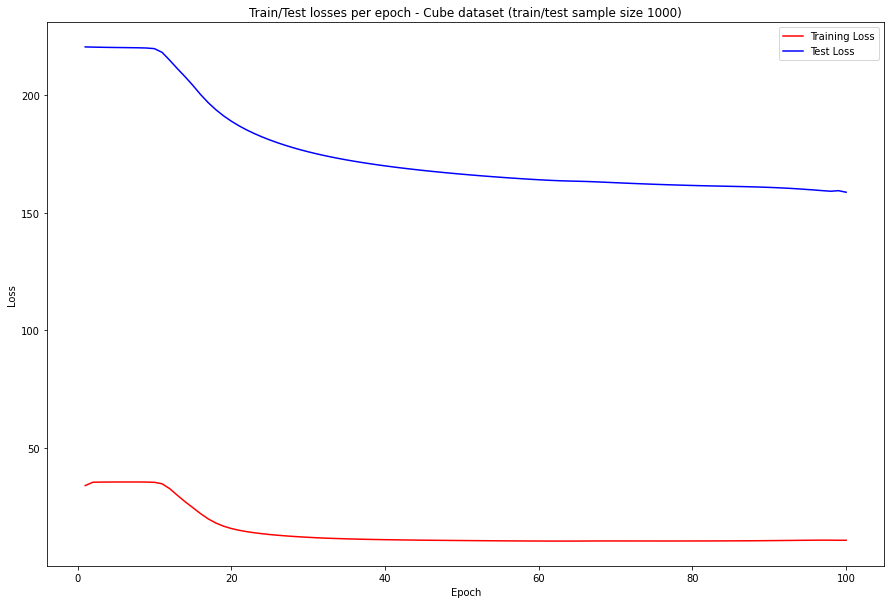

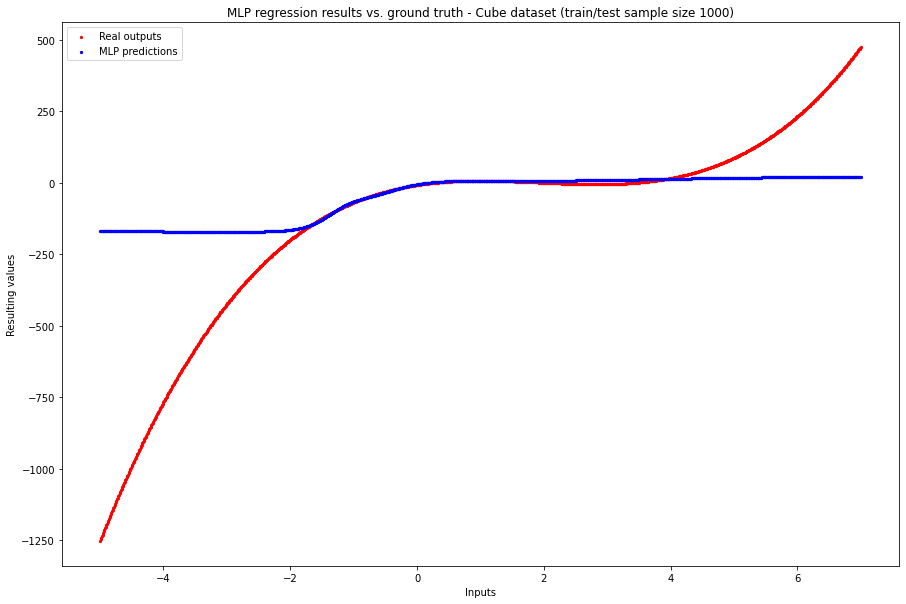

In [5]:
for size in DATASET_SIZES:
    X, Y = read_data(f"{REG}/data.cube.train.{size}.csv")
    X_test, Y_test = read_data(f"{REG}/data.cube.test.{size}.csv")
    layers = [
        Layer(in_size=1, out_size=8, activ_function=Sigmoid),
        Layer(in_size=8, out_size=8, activ_function=Sigmoid),
        Layer(in_size=8, out_size=1, activ_function=Linear),
    ]
    print("=======================================================================================")
    header = f"Cube dataset (train/test sample size {size})"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=AbsoluteError,
        bias=True,
        batch_size=16,
        epochs=100,
        momentum=0.1,
        learning_rate=0.01,
    )
    stats = m.train(X,Y, X_test, Y_test)
    plot_train_test_losses(**stats, title=f"Train/Test losses per epoch - {header}")
    plot_regression_decisions(X_test, Y_test, m, f"MLP regression results vs. ground truth - {header}")

### Cube dataset with normalization

Cube dataset (train/test sample size 1000)
Epoch   10 - train loss 0.128 (std:0.10) - test loss 0.076 (std:0.07)
Epoch   20 - train loss 0.125 (std:0.09) - test loss 0.078 (std:0.06)
Epoch   30 - train loss 0.093 (std:0.07) - test loss 0.078 (std:0.06)
Epoch   40 - train loss 0.085 (std:0.06) - test loss 0.063 (std:0.04)
Epoch   50 - train loss 0.079 (std:0.06) - test loss 0.054 (std:0.04)
Epoch   60 - train loss 0.072 (std:0.05) - test loss 0.046 (std:0.04)
Epoch   70 - train loss 0.066 (std:0.05) - test loss 0.040 (std:0.04)
Epoch   80 - train loss 0.062 (std:0.05) - test loss 0.036 (std:0.04)
Epoch   90 - train loss 0.059 (std:0.05) - test loss 0.034 (std:0.04)
Epoch  100 - train loss 0.057 (std:0.05) - test loss 0.034 (std:0.04)


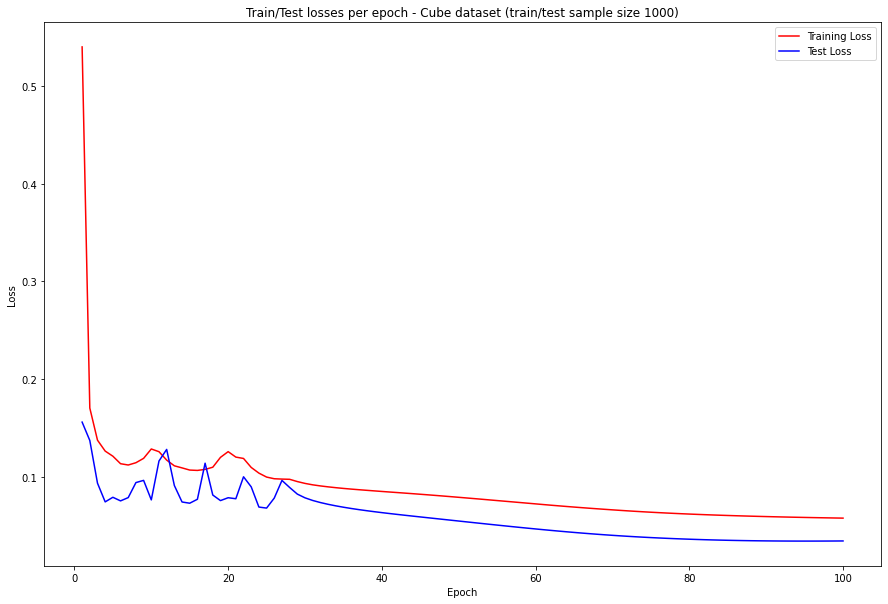

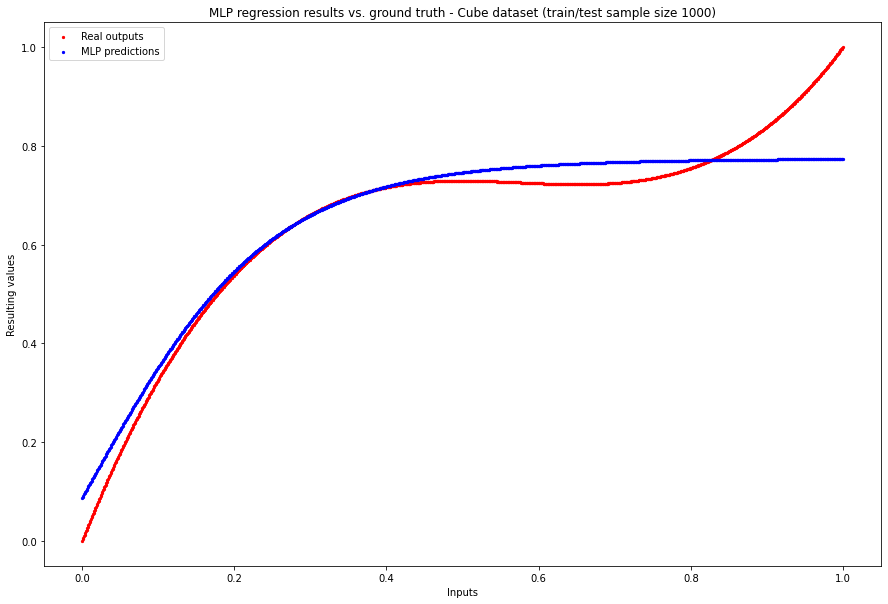

In [6]:
for size in DATASET_SIZES:
    X, Y = read_data(f"{REG}/data.cube.train.{size}.csv", normalize_inputs=True)
    X_test, Y_test = read_data(f"{REG}/data.cube.test.{size}.csv", normalize_inputs=True)
    layers = [
        Layer(in_size=1, out_size=8, activ_function=Sigmoid),
        Layer(in_size=8, out_size=8, activ_function=Sigmoid),
        Layer(in_size=8, out_size=1, activ_function=Linear),
    ]
    print("=======================================================================================")
    header = f"Cube dataset (train/test sample size {size})"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=AbsoluteError,
        bias=True,
        batch_size=1,
        epochs=100,
        momentum=0.99,
        learning_rate=0.01,
    )
    stats = m.train(X,Y, X_test, Y_test)
    plot_train_test_losses(**stats, title=f"Train/Test losses per epoch - {header}")
    plot_regression_decisions(X_test, Y_test, m, f"MLP regression results vs. ground truth - {header}")

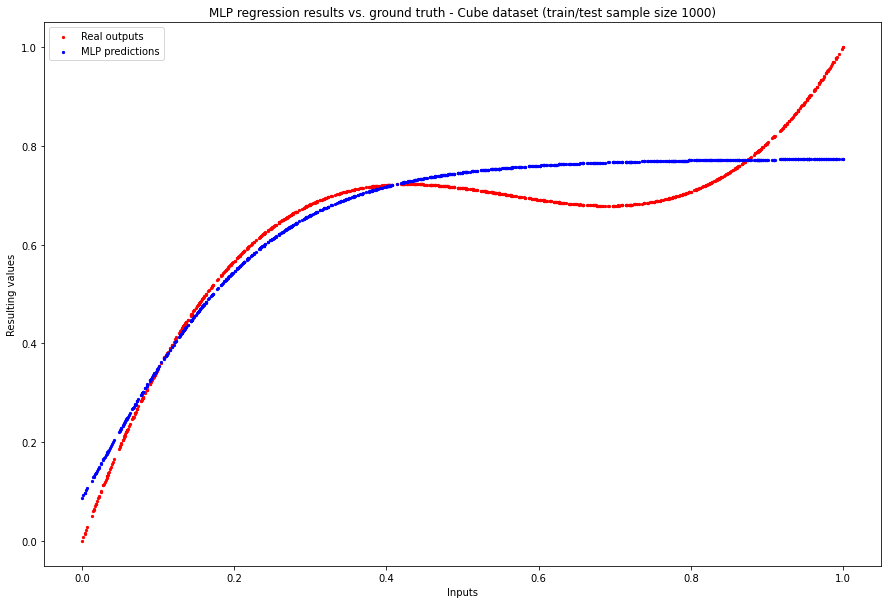

In [7]:
plot_regression_decisions(X, Y, m, f"MLP regression results vs. ground truth - {header}")

# Experiments

# Impact of various activation functions on accuracy


## Simple dataset
- Sigmoid activations
- ReLU activations
- TanH activations


Simple dataset (train/test sample size 1000) Activation function in layers except the last one: Sigmoid
Epoch   10 - train loss 0.637 (std:0.03) - test loss 0.621 (std:0.12)
Epoch   20 - train loss 0.193 (std:0.04) - test loss 0.185 (std:0.20)
Epoch   30 - train loss 0.098 (std:0.03) - test loss 0.099 (std:0.17)
Epoch   40 - train loss 0.070 (std:0.03) - test loss 0.072 (std:0.15)
Epoch   50 - train loss 0.056 (std:0.03) - test loss 0.058 (std:0.14)
Epoch   60 - train loss 0.048 (std:0.03) - test loss 0.049 (std:0.13)
Epoch   70 - train loss 0.042 (std:0.02) - test loss 0.043 (std:0.12)
Epoch   80 - train loss 0.038 (std:0.02) - test loss 0.039 (std:0.12)
Epoch   90 - train loss 0.035 (std:0.02) - test loss 0.035 (std:0.11)
Epoch  100 - train loss 0.032 (std:0.02) - test loss 0.033 (std:0.11)


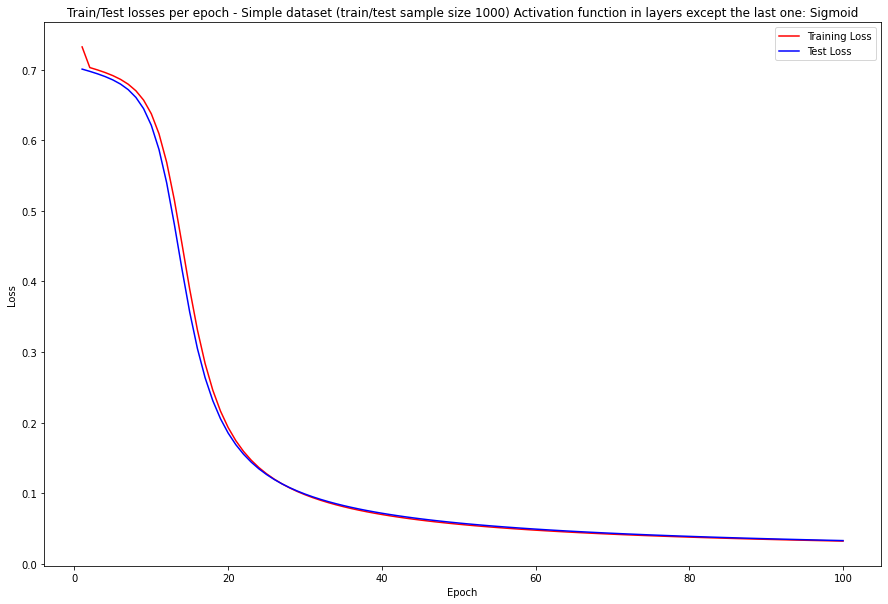

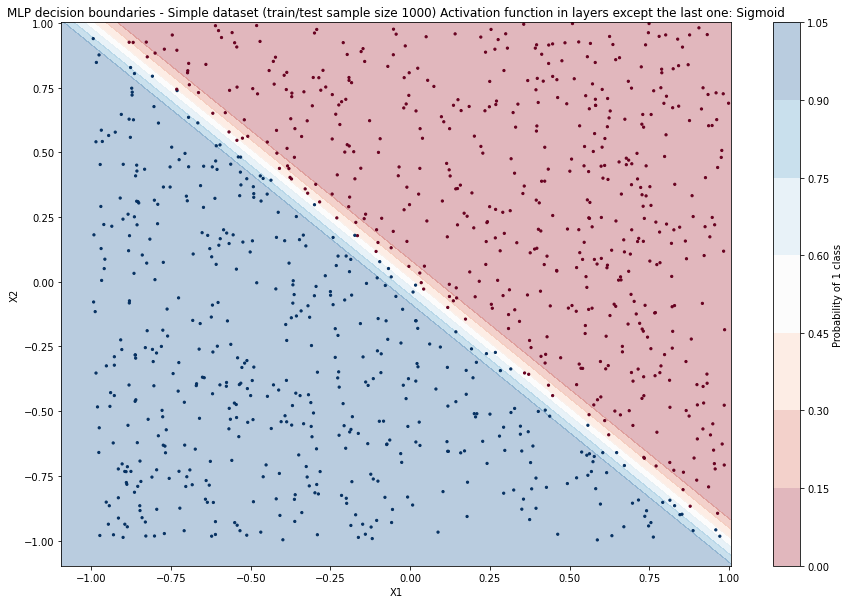

Simple dataset (train/test sample size 1000) Activation function in layers except the last one: ReLU
Epoch   10 - train loss 0.044 (std:0.06) - test loss 0.117 (std:0.52)
Epoch   20 - train loss 0.038 (std:0.06) - test loss 0.092 (std:0.46)
Epoch   30 - train loss 0.034 (std:0.06) - test loss 0.069 (std:0.37)
Epoch   40 - train loss 0.030 (std:0.06) - test loss 0.024 (std:0.14)
Epoch   50 - train loss 0.028 (std:0.06) - test loss 0.024 (std:0.14)
Epoch   60 - train loss 0.027 (std:0.05) - test loss 0.028 (std:0.19)
Epoch   70 - train loss 0.029 (std:0.05) - test loss 0.037 (std:0.23)
Epoch   80 - train loss 0.026 (std:0.05) - test loss 0.033 (std:0.22)
Epoch   90 - train loss 0.025 (std:0.05) - test loss 0.032 (std:0.22)
Epoch  100 - train loss 0.025 (std:0.04) - test loss 0.031 (std:0.21)


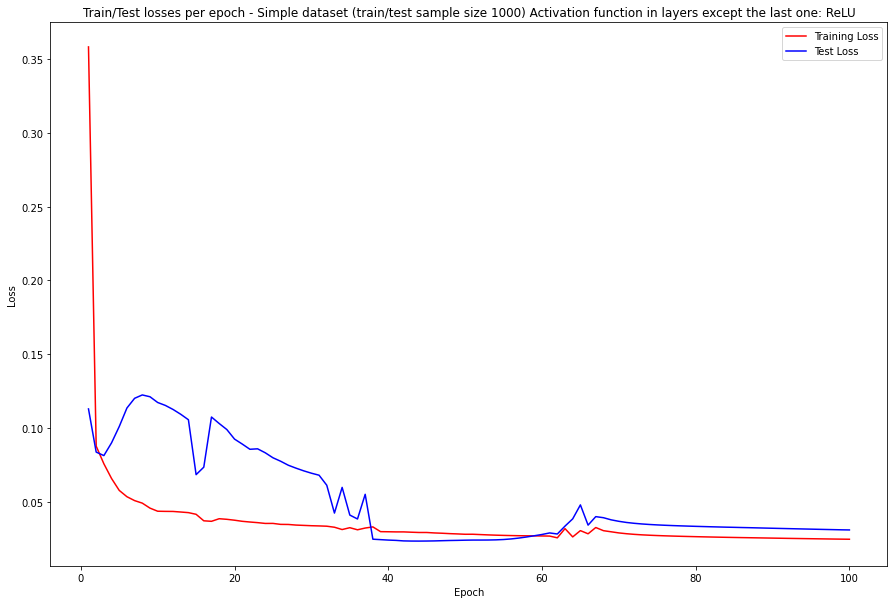

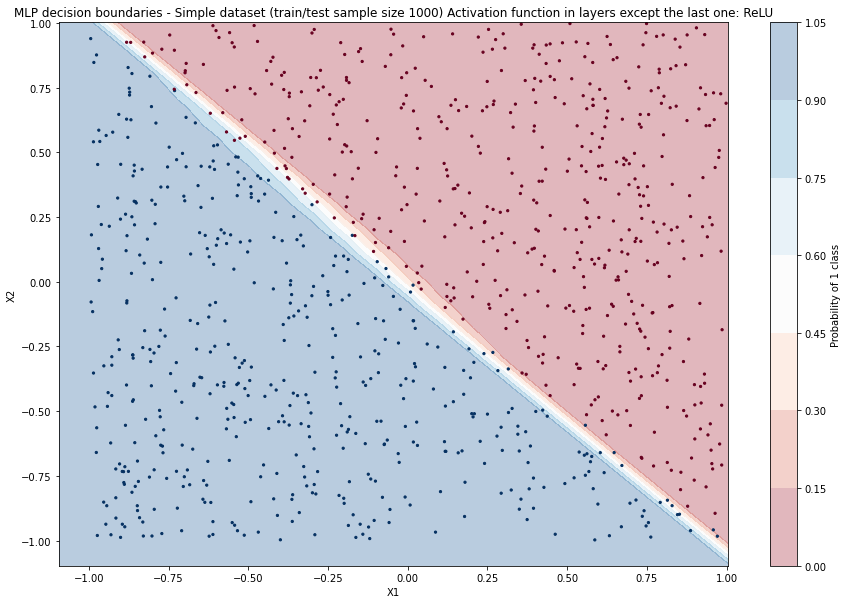

Simple dataset (train/test sample size 1000) Activation function in layers except the last one: TanH
Epoch   10 - train loss 0.032 (std:0.07) - test loss 0.029 (std:0.16)
Epoch   20 - train loss 0.028 (std:0.08) - test loss 0.029 (std:0.17)
Epoch   30 - train loss 0.024 (std:0.06) - test loss 0.041 (std:0.25)
Epoch   40 - train loss 0.026 (std:0.04) - test loss 0.037 (std:0.23)
Epoch   50 - train loss 0.029 (std:0.05) - test loss 0.028 (std:0.18)
Epoch   60 - train loss 0.028 (std:0.05) - test loss 0.022 (std:0.14)
Epoch   70 - train loss 0.026 (std:0.04) - test loss 0.016 (std:0.10)
Epoch   80 - train loss 0.024 (std:0.04) - test loss 0.013 (std:0.08)
Epoch   90 - train loss 0.022 (std:0.04) - test loss 0.012 (std:0.08)
Epoch  100 - train loss 0.020 (std:0.04) - test loss 0.011 (std:0.08)


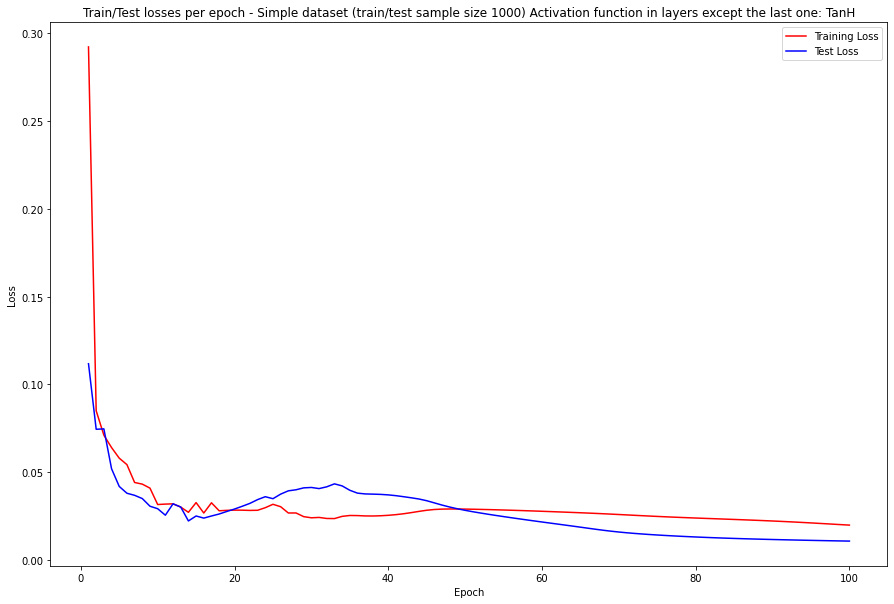

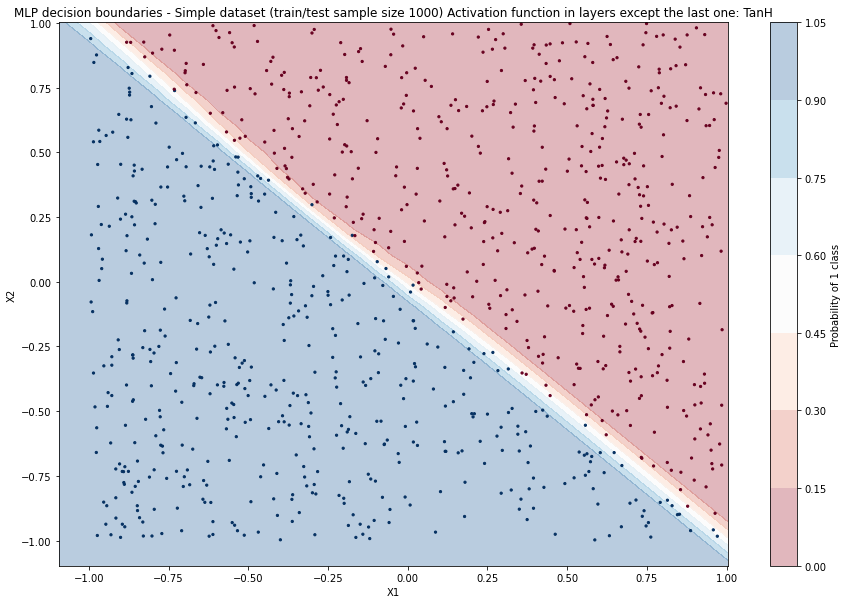

In [8]:
size = DATASET_SIZES[0]
for activation_function in [Sigmoid, ReLU, TanH]:
    X, Y = read_data(f"{CLF}/data.simple.train.{size}.csv", categorical=True)
    X_test, Y_test = read_data(f"{CLF}/data.simple.test.{size}.csv", categorical=True)
    
    layers = [
        Layer(in_size=2, out_size=5, activ_function=activation_function),
        Layer(in_size=5, out_size=5, activ_function=activation_function),
        Layer(in_size=5, out_size=1, activ_function=Sigmoid),
    ]
    print("=======================================================================================")
    header = f"Simple dataset (train/test sample size {size}) Activation function in layers except the last one: {activation_function.__name__}"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=BinaryCrossEntropy,
        bias=True,
        batch_size=16,
        epochs=100,
        momentum=0.001,
        learning_rate=0.5,
    )
    stats = m.train(X,Y, X_test, Y_test)
    plot_train_test_losses(**stats, title=f"Train/Test losses per epoch - {header}")
    plot_categorical_decisions(X_test, Y_test, m, f"MLP decision boundaries - {header}", binary=True)

## Cube dataset
- Sigmoid activations
- ReLU activations
- TanH activations

Cube dataset (train/test sample size 1000) Activation function in layers except the last one: Sigmoid
Epoch   10 - train loss 0.099 (std:0.08) - test loss 0.076 (std:0.07)
Epoch   20 - train loss 0.099 (std:0.08) - test loss 0.172 (std:0.09)
Epoch   30 - train loss 0.095 (std:0.07) - test loss 0.138 (std:0.09)
Epoch   40 - train loss 0.091 (std:0.07) - test loss 0.119 (std:0.08)
Epoch   50 - train loss 0.078 (std:0.06) - test loss 0.056 (std:0.04)
Epoch   60 - train loss 0.064 (std:0.05) - test loss 0.045 (std:0.05)
Epoch   70 - train loss 0.061 (std:0.05) - test loss 0.042 (std:0.04)
Epoch   80 - train loss 0.059 (std:0.05) - test loss 0.043 (std:0.04)
Epoch   90 - train loss 0.057 (std:0.05) - test loss 0.044 (std:0.04)
Epoch  100 - train loss 0.054 (std:0.04) - test loss 0.044 (std:0.04)


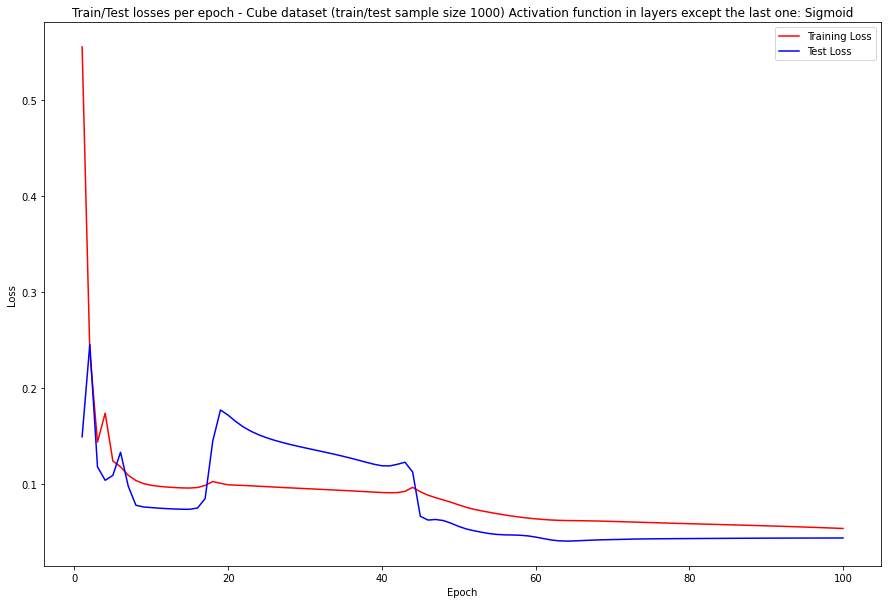

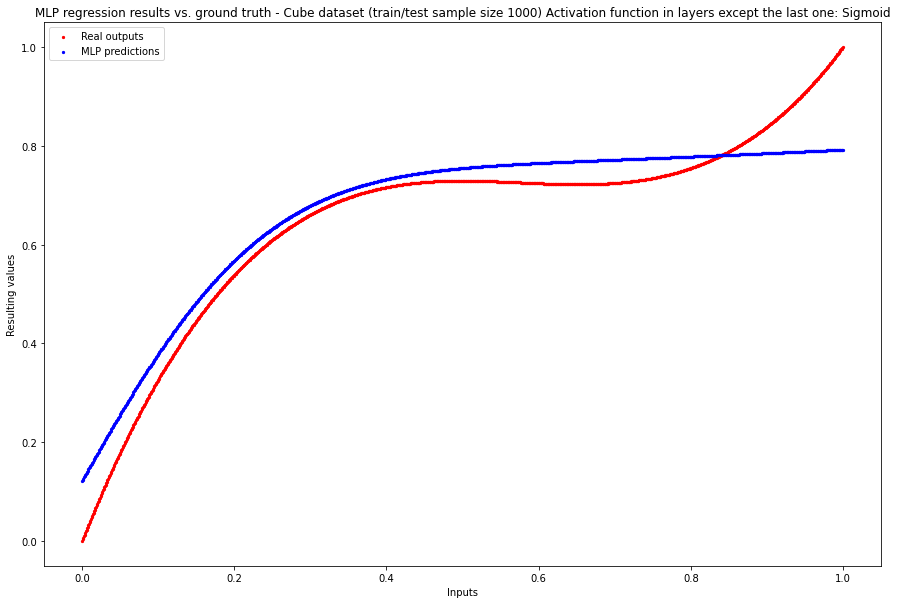

Cube dataset (train/test sample size 1000) Activation function in layers except the last one: ReLU
Epoch   10 - train loss 0.163 (std:0.14) - test loss 0.269 (std:0.11)
Epoch   20 - train loss 0.163 (std:0.14) - test loss 0.269 (std:0.11)
Epoch   30 - train loss 0.163 (std:0.14) - test loss 0.269 (std:0.11)
Epoch   40 - train loss 0.163 (std:0.14) - test loss 0.269 (std:0.11)
Epoch   50 - train loss 0.163 (std:0.14) - test loss 0.269 (std:0.11)
Epoch   60 - train loss 0.163 (std:0.14) - test loss 0.269 (std:0.11)
Epoch   70 - train loss 0.163 (std:0.14) - test loss 0.269 (std:0.11)
Epoch   80 - train loss 0.163 (std:0.14) - test loss 0.269 (std:0.11)
Epoch   90 - train loss 0.163 (std:0.14) - test loss 0.269 (std:0.11)
Epoch  100 - train loss 0.163 (std:0.14) - test loss 0.269 (std:0.11)


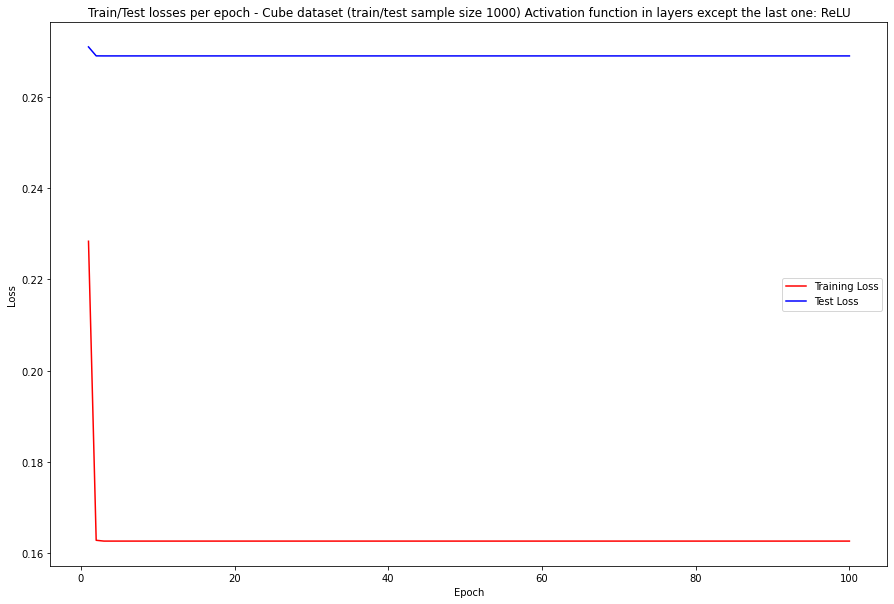

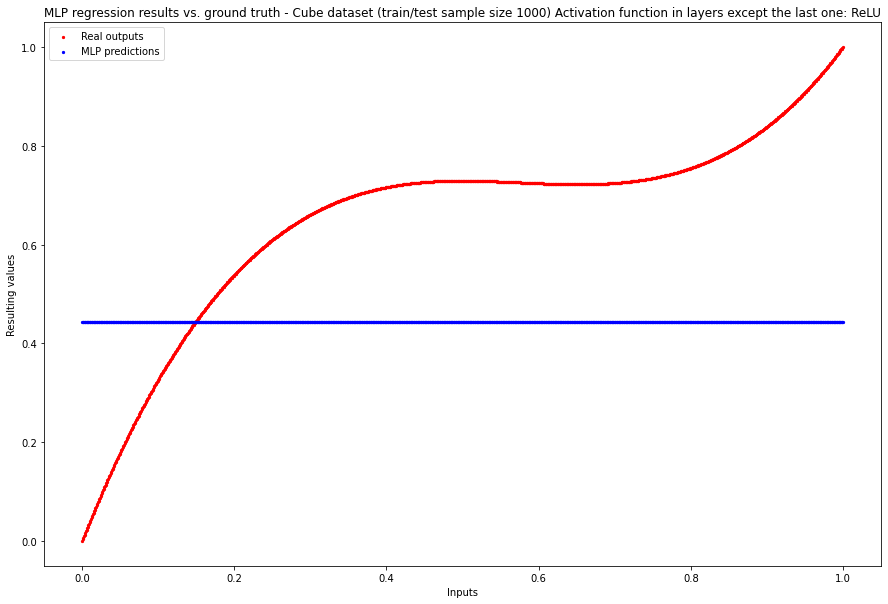

Cube dataset (train/test sample size 1000) Activation function in layers except the last one: TanH
Epoch   10 - train loss 0.272 (std:0.21) - test loss 0.157 (std:0.12)
Epoch   20 - train loss 0.276 (std:0.21) - test loss 0.162 (std:0.12)
Epoch   30 - train loss 0.270 (std:0.20) - test loss 0.156 (std:0.12)
Epoch   40 - train loss 0.145 (std:0.11) - test loss 0.078 (std:0.10)
Epoch   50 - train loss 0.103 (std:0.08) - test loss 0.099 (std:0.04)
Epoch   60 - train loss 0.087 (std:0.07) - test loss 0.064 (std:0.03)
Epoch   70 - train loss 0.089 (std:0.07) - test loss 0.062 (std:0.03)
Epoch   80 - train loss 0.089 (std:0.07) - test loss 0.061 (std:0.03)
Epoch   90 - train loss 0.089 (std:0.07) - test loss 0.060 (std:0.03)
Epoch  100 - train loss 0.089 (std:0.07) - test loss 0.060 (std:0.03)


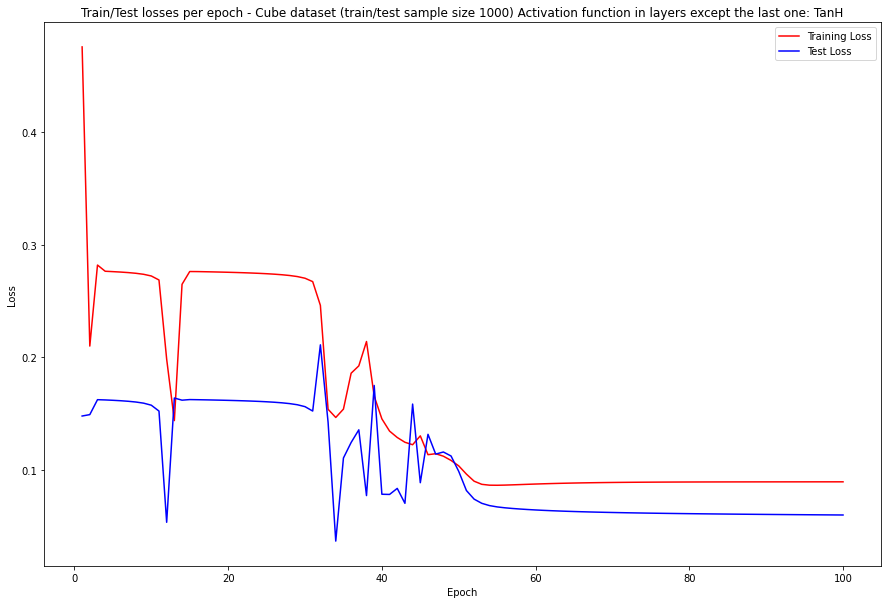

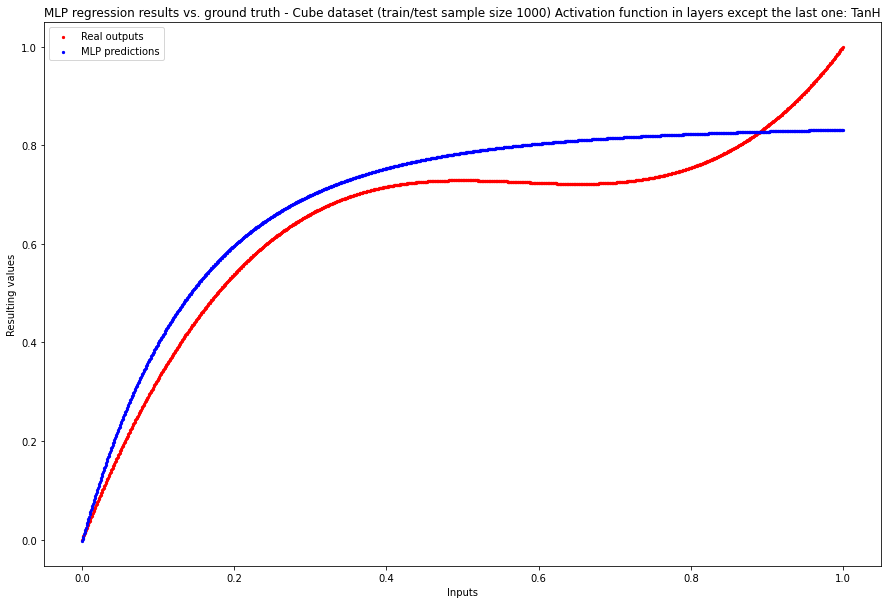

In [9]:
size = DATASET_SIZES[0]
results = []
for activation_function in [Sigmoid, ReLU, TanH]:
    X, Y = read_data(f"{REG}/data.cube.train.{size}.csv", normalize_inputs=True)
    X_test, Y_test = read_data(f"{REG}/data.cube.test.{size}.csv", normalize_inputs=True)
    layers = [
        Layer(in_size=1, out_size=8, activ_function=activation_function),
        Layer(in_size=8, out_size=8, activ_function=activation_function),
        Layer(in_size=8, out_size=1, activ_function=Linear),
    ]
    print("=======================================================================================")
    header = f"Cube dataset (train/test sample size {size}) Activation function in layers except the last one: {activation_function.__name__}"
    print(header)
    print("=======================================================================================")
    m = MLP(
        layers=layers,
        loss=AbsoluteError,
        bias=True,
        batch_size=1,
        epochs=100,
        momentum=0.99,
        learning_rate=0.01,
    )

    stats = m.train(X,Y, X_test, Y_test)
    plot_train_test_losses(**stats, title=f"Train/Test losses per epoch - {header}")
    plot_regression_decisions(X_test, Y_test, m, f"MLP regression results vs. ground truth - {header}")

# Impact of number of hidden layers and their size on accuracy

## Three gauss dataset:
- hidden layer numbers: 1, 3, 5
- hidden layer sizes: 3, 5, 10

In [10]:
size = DATASET_SIZES[0]
hidden_layers = [1, 3, 5]
hidden_layer_sizes = [3, 5, 10]
result_dict = {n: [] for n in hidden_layers}

for hidden_layer_number in hidden_layers:
    for hidden_layer_size in hidden_layer_sizes:
        X, Y = read_data(f"{CLF}/data.three_gauss.train.{size}.csv", categorical=True)
        X_test, Y_test = read_data(f"{CLF}/data.three_gauss.test.{size}.csv", categorical=True)
        
        layers = [
            Layer(in_size=2, out_size=hidden_layer_size, activ_function=Sigmoid),
            *[Layer(in_size=hidden_layer_size, out_size=hidden_layer_size, activ_function=Sigmoid) for _ in range(hidden_layer_number)],
            Layer(in_size=hidden_layer_size, out_size=3, activ_function=SoftMax),
        ]
        
        print("=======================================================================================")
        header = f"Three Gauss dataset (train/test sample size {size}) - {hidden_layer_number} hidden layers, hidden layer size {hidden_layer_size}"
        print(header)
        print("=======================================================================================")
        m = MLP(
            layers=layers,
            loss=CategoricalCrossEntropy,
            bias=True,
            batch_size=16,
            epochs=100,
            momentum=0.1,
            learning_rate=0.2,
        )
        stats = m.train(X,Y, X_test, Y_test)
        #plot_train_test_losses(**stats, title=f"Train/Test losses per epoch - {header}")
        #plot_categorical_decisions(X_test, Y_test, m, f"MLP decision boundaries - {header}")
        result_dict[hidden_layer_number].append(f"{stats['test_losses'][-1]:5.3f} (std: {stats['test_losses_stds'][-1]:3.2f})")

results = pd.DataFrame(result_dict)
results.index = hidden_layer_sizes
results

Three Gauss dataset (train/test sample size 1000) - 1 hidden layers, hidden layer size 3
Epoch   10 - train loss 0.366 (std:0.01) - test loss 0.366 (std:0.03)
Epoch   20 - train loss 0.364 (std:0.01) - test loss 0.364 (std:0.03)
Epoch   30 - train loss 0.361 (std:0.01) - test loss 0.361 (std:0.03)
Epoch   40 - train loss 0.349 (std:0.01) - test loss 0.348 (std:0.05)
Epoch   50 - train loss 0.299 (std:0.02) - test loss 0.296 (std:0.10)
Epoch   60 - train loss 0.227 (std:0.04) - test loss 0.226 (std:0.15)
Epoch   70 - train loss 0.192 (std:0.05) - test loss 0.193 (std:0.22)
Epoch   80 - train loss 0.178 (std:0.07) - test loss 0.181 (std:0.29)
Epoch   90 - train loss 0.173 (std:0.09) - test loss 0.178 (std:0.35)
Epoch  100 - train loss 0.172 (std:0.10) - test loss 0.178 (std:0.40)
Three Gauss dataset (train/test sample size 1000) - 1 hidden layers, hidden layer size 5
Epoch   10 - train loss 0.362 (std:0.01) - test loss 0.360 (std:0.01)
Epoch   20 - train loss 0.345 (std:0.01) - test loss

,1,3,5
3,0.178 (std: 0.40),0.367 (std: 0.02),0.367 (std: 0.02)
5,0.078 (std: 0.18),0.367 (std: 0.02),0.367 (std: 0.03)
10,0.078 (std: 0.20),0.367 (std: 0.02),0.370 (std: 0.05)


## Activation dataset
- hidden layer numbers: 1, 3, 5
- hidden layer sizes: 3, 5, 10

In [13]:
size = DATASET_SIZES[0]
hidden_layers = [1, 3, 5]
hidden_layer_sizes = [3, 5, 10]
result_dict = {n: [] for n in hidden_layers}

for hidden_layer_number in hidden_layers:
    for hidden_layer_size in hidden_layer_sizes:
        X, Y = read_data(f"{REG}/data.activation.train.{size}.csv")
        X_test, Y_test = read_data(f"{REG}/data.activation.test.{size}.csv")
        
        layers = [
            Layer(in_size=1, out_size=hidden_layer_size, activ_function=Sigmoid),
            *[Layer(in_size=hidden_layer_size, out_size=hidden_layer_size, activ_function=Sigmoid) for _ in range(hidden_layer_number)],
            Layer(in_size=hidden_layer_size, out_size=1, activ_function=Linear),
        ]
        
        print("=======================================================================================")
        header = f"Activation dataset (train/test sample size {size}) - {hidden_layer_number} hidden layers, hidden layer size {hidden_layer_size}"
        print(header)
        print("=======================================================================================")
        m = MLP(
            layers=layers,
            loss=AbsoluteError,
            bias=True,
            batch_size=16,
            epochs=100,
            momentum=0.1,
            learning_rate=0.01,
        )
        stats = m.train(X,Y, X_test, Y_test)
        #plot_train_test_losses(**stats, title=f"Train/Test losses per epoch - {header}")
        #plot_regression_decisions(X_test, Y_test, m, f"MLP regression results vs. ground truth - {header}")
        result_dict[hidden_layer_number].append(f"{stats['test_losses'][-1]:7.3f} (std: {stats['test_losses_stds'][-1]:7.2f})")

        
results = pd.DataFrame(result_dict)
results.index = hidden_layer_sizes
results

Activation dataset (train/test sample size 1000) - 1 hidden layers, hidden layer size 3
Epoch   10 - train loss 11.662 (std:2.48) - test loss 23.527 (std:19.41)
Epoch   20 - train loss 3.194 (std:0.93) - test loss 12.051 (std:14.41)
Epoch   30 - train loss 1.617 (std:0.49) - test loss 8.990 (std:12.41)
Epoch   40 - train loss 1.058 (std:0.31) - test loss 7.517 (std:11.36)
Epoch   50 - train loss 0.782 (std:0.23) - test loss 6.594 (std:10.54)
Epoch   60 - train loss 0.626 (std:0.18) - test loss 5.954 (std:9.87)
Epoch   70 - train loss 0.525 (std:0.15) - test loss 5.481 (std:9.32)
Epoch   80 - train loss 0.453 (std:0.13) - test loss 5.114 (std:8.88)
Epoch   90 - train loss 0.395 (std:0.12) - test loss 4.821 (std:8.51)
Epoch  100 - train loss 0.350 (std:0.11) - test loss 4.596 (std:8.19)
Activation dataset (train/test sample size 1000) - 1 hidden layers, hidden layer size 5
Epoch   10 - train loss 78.845 (std:9.17) - test loss 110.022 (std:58.86)
Epoch   20 - train loss 78.809 (std:9.16) 

,1,3,5
3,4.596 (std: 8.19),109.870 (std: 57.15),109.703 (std: 59.94)
5,27.830 (std: 21.04),109.718 (std: 59.91),109.743 (std: 59.07)
10,109.669 (std: 63.01),109.679 (std: 60.51),109.683 (std: 60.37)


# Training network on other arbitrary data

### A code prepared to train arbitrary network